In [11]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [12]:
n = 10
x = np.linspace(0,100,n)

In [16]:
np.random.seed(0)
y_obs = 1.6*x+25+np.random.normal(0,20,n)

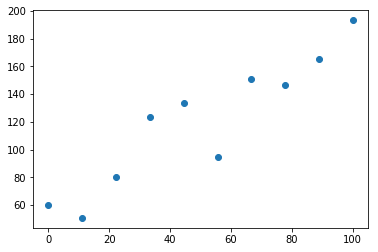

In [17]:
scatter(x,y_obs)

In [26]:
def log_likelihood(a,b):
    y = a*x + b
    chi2 = 0
    for i in range(y.shape[0]):
        chi2 = (y[i] - y_obs[i])**2/n**2
    return chi2

In [20]:
def plot_adjust(a,b):
    y = a*x +b
    scatter(x,y_obs)
    plot(x,y)

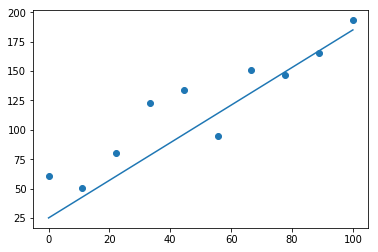

In [21]:
plot_adjust(1.6,25)

In [22]:
m0=1
b0=1
walk = [[m0,b0]]

In [31]:
for i in range(100):
    mant = walk[-1][0]
    bant = walk[-1][1]
    mn = mant + (np.random.rand()-0.5) * 0.1
    bn = bant + (np.random.rand()-0.5) * 0.1
    
    alpha = exp(-log_likelihood(mn,bn))/exp(-log_likelihood(mant,bant))
    print(alpha)
    
    if(alpha >= 1):
        walk.append([mn,bn])
    else:
        walk.append([mant,bant])
    print(mn, bn)

40675.48543647658
0.8367759507691765 0.8605419409798257
155.26268332529727
0.8607023087090067 0.8144607202052578
0.008666303804565843
0.8389830049666476 0.7764803763265747
0.011569548496097218
0.8403163284612212 0.7763334921006823
0.019794602729346255
0.8425006266484043 0.8058870196567248
8.141383382414828e-05
0.8171170583438851 0.8337079321422598
3.9051278762365573
0.8673624541296642 0.7909996692992024
1.4995965388692363
0.8696872594763342 0.7503937203750466
5.400542691273604
0.8772819090319521 0.793323340132668
0.02245864112462515
0.8591388042770844 0.8100643781290362


In [33]:
walk = array(walk)
print (walk)


[[1.         1.        ]
 [0.99561503 1.00684339]
 [0.94749401 1.01860694]
 [0.9334448  1.01231014]
 [0.90448306 0.97520277]
 [0.88602589 0.96157385]
 [0.88602589 0.96157385]
 [0.85691357 0.9277048 ]
 [0.85691357 0.9277048 ]
 [0.85354465 0.90214736]
 [0.81944161 0.86318487]
 [0.81944161 0.86318487]
 [0.78909984 0.85005739]
 [0.78909984 0.85005739]
 [0.78909984 0.85005739]
 [0.78909984 0.85005739]
 [0.83677595 0.86054194]
 [0.86070231 0.81446072]
 [0.86070231 0.81446072]
 [0.86070231 0.81446072]
 [0.86070231 0.81446072]
 [0.86070231 0.81446072]
 [0.86736245 0.79099967]
 [0.86968726 0.75039372]
 [0.87728191 0.79332334]
 [0.87728191 0.79332334]]


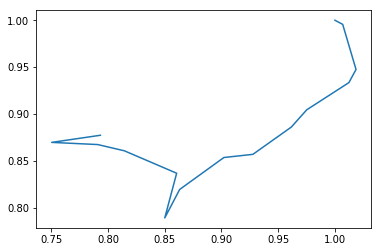

In [36]:
plot( walk[:,1],walk[:,0])

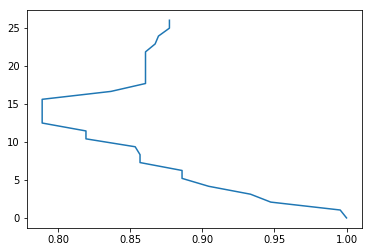

In [35]:
plot(walk[:,0], linspace(0,len(walk), len(walk)))